In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
from dateutil.relativedelta import relativedelta
import numpy as np
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [256]:
train=pd.read_csv('./data/train_clean.csv')
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 25 columns):
CUST_COD               26884 non-null int64
LIMIT_BAL              26884 non-null float64
SEX                    26626 non-null object
EDUCATION              26571 non-null object
MARRIAGE               26834 non-null object
BIRTH_DATE             26182 non-null object
PAY_DEC                26884 non-null int64
PAY_NOV                26884 non-null int64
PAY_OCT                26884 non-null int64
PAY_SEP                26884 non-null int64
PAY_AUG                26884 non-null int64
PAY_JUL                26884 non-null int64
BILL_AMT_DEC           26884 non-null float64
BILL_AMT_NOV           26884 non-null float64
BILL_AMT_OCT           26884 non-null float64
BILL_AMT_SEP           26884 non-null float64
BILL_AMT_AUG           26884 non-null float64
BILL_AMT_JUL           26884 non-null float64
PAY_AMT_DEC            26884 non-null float64
PAY_AMT_NOV            26884 non-nu

,CUST_COD,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,...,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,DEFAULT PAYMENT JAN
0,53613503,1490.680,M,university,single,NaN,0,0,0,0,...,629.156401,599.283174,608.257067,89.440800,149.06800,68.571280,0.000000,29.81360,59.627200,0
1,35524089,5664.584,M,university,married,04/01/1983,0,0,0,0,...,533.872135,-2.772665,-14.399969,149.068000,159.83071,29.813600,0.000000,0.00000,0.000000,1
2,58777007,6260.856,F,high school,married,02/01/1975,0,0,-1,-1,...,-19.349026,-19.349026,-19.349026,59.627200,532.59015,16.963938,0.000000,0.00000,29.813600,0
3,26913418,8944.080,F,graduate school,married,15/01/1977,-2,-2,-2,-2,...,88.546392,70.330282,253.177091,80.556347,217.22189,88.784901,70.628418,298.46395,216.416922,0
4,41993633,3577.632,F,graduate school,married,09/01/1978,-1,-1,-1,-1,...,0.000000,569.439760,0.000000,119.254400,29.81360,0.000000,569.439760,0.00000,0.000000,1


__Analising BIRTH_DATE attribute

In [257]:
train["BIRTH_DATE"].describe()

count          26182
unique          1380
top       01/01/1988
freq              68
Name: BIRTH_DATE, dtype: object

Transforming bithdate in age

In [258]:
train["BIRTH_DATE"]= pd.to_datetime(train["BIRTH_DATE"]) 
now=datetime.datetime.now()
train["AGE"]=now-train["BIRTH_DATE"]
train["AGE"]=train["AGE"]/365.25
train["AGE"]=(train["AGE"] /np.timedelta64(1, 'D')).astype(str)


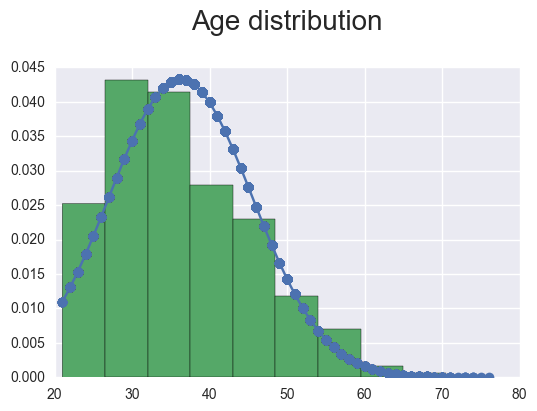

In [259]:
notNanAge=[]
for i in train["AGE"]:
    if(i!="nan"):
        notNanAge.append(int(float(i)))
notNanAge.sort()
notNanAge_mean = np.mean(notNanAge)
notNanAge_std = np.std(notNanAge)
pdf = stats.norm.pdf(notNanAge, notNanAge_mean, notNanAge_std)
plt.plot(notNanAge, pdf,'-o')
plt.hist(notNanAge,normed=True) 
plt.title('Age distribution', size=20, y=1.1)


In [260]:
plt.show()

In [261]:
print(min(notNanAge))
print(max(notNanAge))

21
76


Similar to a Gaussian distribution, for the moment we only keep track of the missing values. Probably it's a good idea to fill NaN with gaussian random generated number.

__Default Payment__

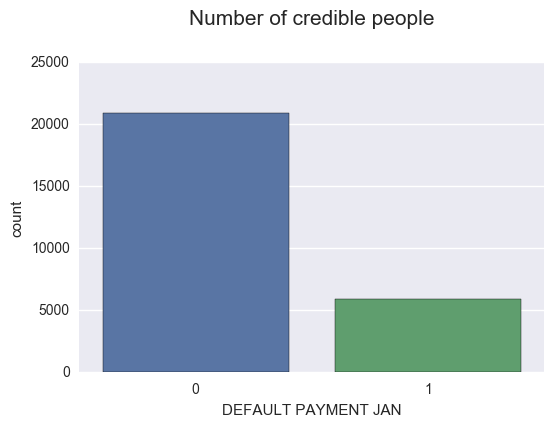

In [262]:
plt.title('Number of credible people', y=1.1, size=15)
sns.countplot('DEFAULT PAYMENT JAN', data=train)

__Marriage__

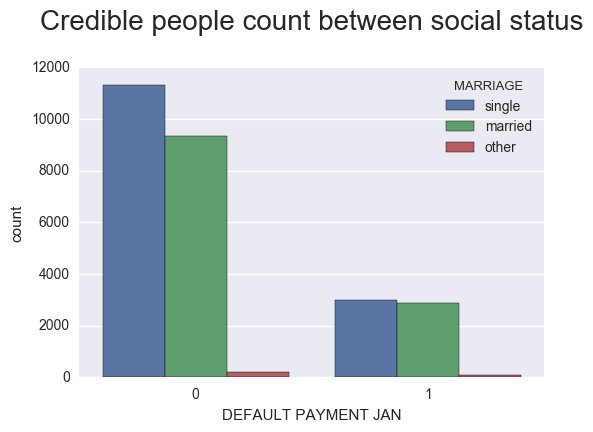

In [263]:
plt.title('Credible people count between social status', size=20, y=1.1)
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue='MARRIAGE', data=train)

The number of single and married people between insolvent people is almost the same, so maybe this attribute is not very significant to do the analysis (?)

__Education__

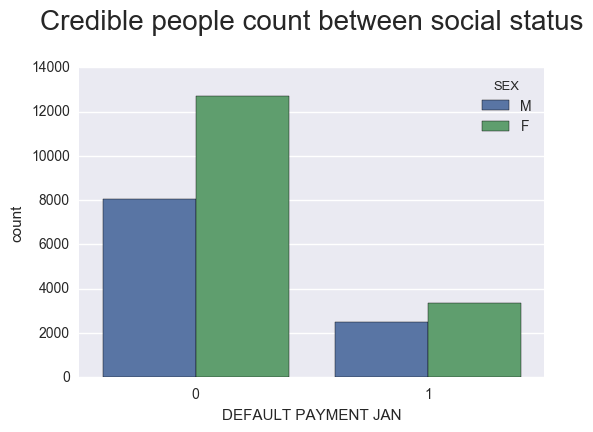

In [264]:
plt.title('Credible people count between social status', size=20, y=1.1)
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue='SEX', data=train)